In [182]:
import csv
import math
from matplotlib import pyplot as plt
from Habitable_Methods import *

In [183]:
earth = {
    'j_compared_mass': float(1 / (3.178 * 10**2)),
    'temperature': float(5800)
}

def earth_like_score_mass(planet_mass):
    if(planet_mass != ''):
        return abs(float(planet_mass) / earth['j_compared_mass'])
    return -1

def daylight_strength(radius, temp, period):
    if(radius != '' and temp != '' and period != ''):
        return (float(radius)**2) * ((float(temp) / earth['temperature']))**4 * float(period)**(-2)
    return -1

In [184]:
filename = 'Hab.csv'
file = open(filename, 'r')
csv_reader = csv.reader(file, delimiter=',', quotechar='"')
table = list(csv_reader)

star_radius_index = table[0].index('star_radius')
semi_major_axis_index = table[0].index('semi_major_axis')
star_teff_index = table[0].index('star_teff')
mass_index = table[0].index('mass')

all_planets = {}
valid_planets = {}
current_row = 1

for planet in table[1:]:
    
    mass_score = earth_like_score_mass(planet[mass_index])
    solar_score = daylight_strength(
            planet[star_radius_index], 
            planet[star_teff_index],
            planet[semi_major_axis_index])

    if(mass_score != -1 and solar_score != -1):
        valid_planets[planet[0]] = {
            "row": current_row,
            "mass_score": mass_score,
            "solar_score": solar_score,
            "original_values": planet
        }

    current_row += 1

0 TRAPPIST-1 d
1 TRAPPIST-1 e
2 TRAPPIST-1 f
3 TRAPPIST-1 c
4 TOI-700 d
5 K2-3 d
6 GJ 273 b


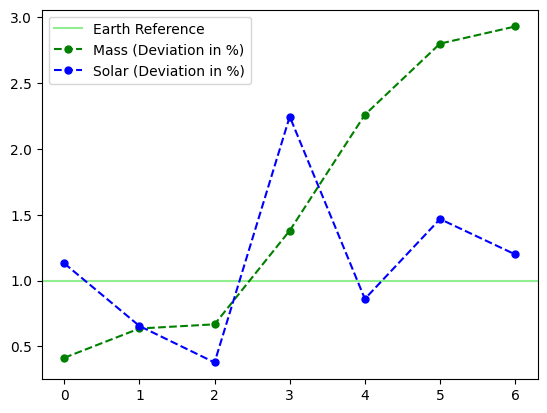

In [185]:
valid_planets = dict(sorted(valid_planets.items(), key=lambda x: float(x[1]['mass_score'])))
mass_score_limit = 3 # max 4 times the earth mass ad min 1/4 times the earths mass
solar_score_limit = 3 # mas 4 times, .........

current = 0
y_mass_values = []
y_solar_values = []

for planet in valid_planets.values():
    if((1/mass_score_limit) <= planet['mass_score'] <= mass_score_limit):
        if((1/solar_score_limit) <= planet['solar_score'] <= solar_score_limit):
            print(current, planet['original_values'][0])
            y_mass_values.append(planet['mass_score'])
            y_solar_values.append(planet['solar_score'])
            current += 1


plt.axhline(1, color='lightgreen', label='Earth Reference')
plt.plot(y_mass_values, 'go--', label='Mass (Deviation in %)', markersize=5)
plt.plot(y_solar_values, 'bo--', label='Solar (Deviation in %)', markersize=5)
plt.legend()